In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:08<00:00, 24.8MB/s]
100% 163M/163M [00:08<00:00, 20.6MB/s]


In [5]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_301.jpg', 'with_mask_3571.jpg', 'with_mask_3709.jpg', 'with_mask_575.jpg', 'with_mask_3160.jpg']
['with_mask_3614.jpg', 'with_mask_595.jpg', 'with_mask_3249.jpg', 'with_mask_3115.jpg', 'with_mask_1574.jpg']


In [10]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_980.jpg', 'without_mask_413.jpg', 'without_mask_1111.jpg', 'without_mask_1325.jpg', 'without_mask_198.jpg']
['without_mask_2899.jpg', 'without_mask_2644.jpg', 'without_mask_2995.jpg', 'without_mask_1835.jpg', 'without_mask_2853.jpg']


In [11]:
print('no.of mask images: ',len(with_mask_files))
print('no.of without mask images: ',len(without_mask_files))

no.of mask images:  3725
no.of without mask images:  3828


In [12]:
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels),len(without_mask_labels))

3725 3828


In [15]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5],labels[-5:])

7553
[1, 1, 1, 1, 1] [0, 0, 0, 0, 0]


In [18]:
img=mpimg.imread('/content/data/with_mask/with_mask_1574.jpg')
imgplot=plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/with_mask/without_mask_2644.jpg'

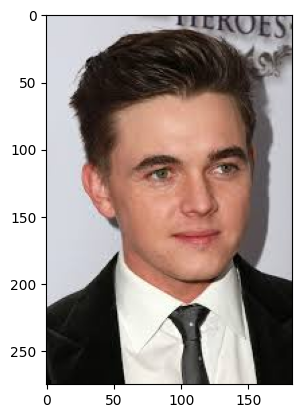

In [19]:
img=mpimg.imread('/content/data/without_mask/without_mask_2644.jpg')
imgplot=plt.imshow(img)
plt.show()

In [20]:
with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'


for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

array([[[45, 46, 51],
        [45, 46, 51],
        [45, 46, 51],
        ...,
        [59, 63, 75],
        [52, 56, 67],
        [44, 47, 56]],

       [[45, 46, 51],
        [45, 46, 51],
        [44, 45, 50],
        ...,
        [59, 62, 74],
        [55, 58, 67],
        [48, 51, 60]],

       [[43, 44, 49],
        [43, 44, 49],
        [43, 44, 49],
        ...,
        [47, 49, 61],
        [47, 50, 58],
        [43, 46, 55]],

       ...,

       [[84, 68, 49],
        [87, 68, 51],
        [94, 71, 57],
        ...,
        [82, 85, 92],
        [83, 86, 93],
        [85, 88, 95]],

       [[82, 66, 49],
        [87, 68, 53],
        [93, 70, 56],
        ...,
        [82, 85, 92],
        [82, 85, 92],
        [83, 86, 93]],

       [[82, 65, 49],
        [87, 68, 53],
        [92, 69, 55],
        ...,
        [81, 84, 91],
        [81, 84, 91],
        [82, 85, 92]]], dtype=uint8)
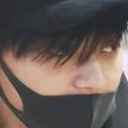

In [23]:
data[0]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
X=np.array(data)
Y=np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
X_train_scaled=X_train/255

In [34]:
X_test_scaled=X_test/255

array([[[ 24,  23,  21],
        [ 24,  23,  21],
        [ 25,  24,  22],
        ...,
        [ 31,  33,  32],
        [ 22,  23,  22],
        [ 16,  16,  16]],

       [[ 25,  24,  22],
        [ 25,  24,  22],
        [ 25,  24,  22],
        ...,
        [ 32,  34,  33],
        [ 25,  26,  26],
        [ 20,  20,  20]],

       [[ 25,  24,  22],
        [ 25,  24,  22],
        [ 25,  24,  22],
        ...,
        [ 31,  32,  31],
        [ 25,  26,  25],
        [ 22,  21,  21]],

       ...,

       [[175, 121,  82],
        [175, 122,  82],
        [175, 122,  82],
        ...,
        [221, 217, 216],
        [219, 215, 214],
        [219, 215, 214]],

       [[172, 120,  81],
        [175, 122,  82],
        [177, 124,  84],
        ...,
        [220, 216, 216],
        [218, 214, 214],
        [217, 213, 213]],

       [[170, 119,  80],
        [174, 121,  82],
        [178, 124,  86],
        ...,
        [218, 214, 215],
        [216, 212, 213],
        [215, 211, 212]]], dtype=uint8)
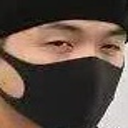

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[0.09411765, 0.09019608, 0.08235294],
        [0.09411765, 0.09019608, 0.08235294],
        [0.09803922, 0.09411765, 0.08627451],
        ...,
        [0.12156863, 0.12941176, 0.1254902 ],
        [0.08627451, 0.09019608, 0.08627451],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.09803922, 0.09411765, 0.08627451],
        [0.09803922, 0.09411765, 0.08627451],
        [0.09803922, 0.09411765, 0.08627451],
        ...,
        [0.1254902 , 0.13333333, 0.12941176],
        [0.09803922, 0.10196078, 0.10196078],
        [0.07843137, 0.07843137, 0.07843137]],

       [[0.09803922, 0.09411765, 0.08627451],
        [0.09803922, 0.09411765, 0.08627451],
        [0.09803922, 0.09411765, 0.08627451],
        ...,
        [0.12156863, 0.1254902 , 0.12156863],
        [0.09803922, 0.10196078, 0.09803922],
        [0.08627451, 0.08235294, 0.08235294]],

       ...,

       [[0.68627451, 0.4745098 , 0.32156863],
        [0.68627451, 0.47843137, 0.32156863],
        [0.68627451, 0

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - acc: 0.6778 - loss: 0.7085 - val_acc: 0.8628 - val_loss: 0.3313
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8762 - loss: 0.3234 - val_acc: 0.9058 - val_loss: 0.2505
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9110 - loss: 0.2395 - val_acc: 0.8860 - val_loss: 0.2509
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9167 - loss: 0.2064 - val_acc: 0.9157 - val_loss: 0.2171
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9383 - loss: 0.1612 - val_acc: 0.9190 - val_loss: 0.2130


In [42]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print(loss,accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9258 - loss: 0.1875
0.18896588683128357 0.9205824136734009


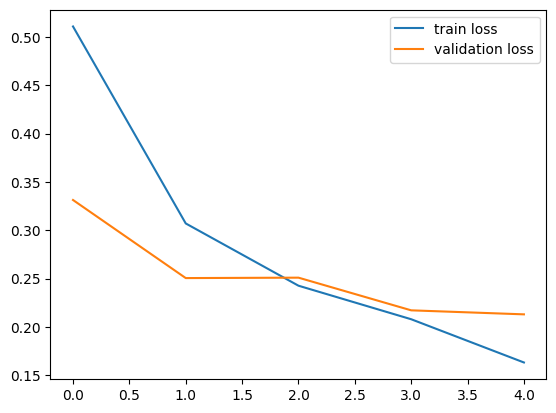

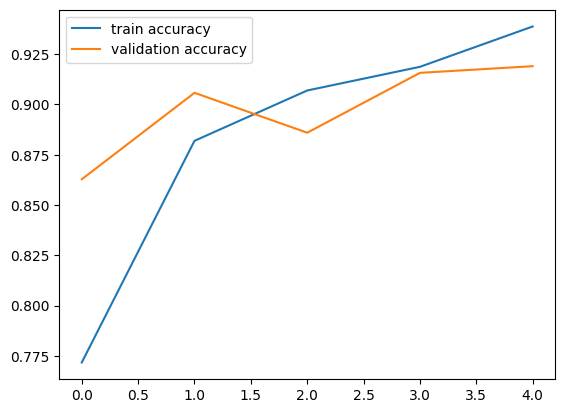

In [43]:
h=history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/not_mask.jpg


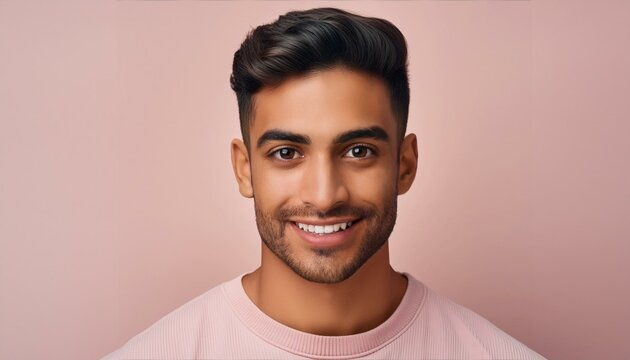

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.21330352 0.55750686]]
1
The person in the image is wearing a mask


In [53]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_prediction_label=np.argmax(input_prediction)

print(input_prediction_label)

if input_prediction_label==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')